<a href="https://colab.research.google.com/github/renan-gomes/Data_Science_portfolio/blob/main/%20Wrangling_Dataviz_Dev/CrossFit_database_Wrangling_%2B_Dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kaggle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [10]:
!kaggle datasets download -d ulrikthygepedersen/crossfit-athletes

 41% 5.00M/12.3M [00:00<00:00, 30.4MB/s]
100% 12.3M/12.3M [00:00<00:00, 57.6MB/s]


In [11]:
import zipfile

file_path = '/content/crossfit-athletes.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle/')  # Replace 'destination_folder' with your desired folder

In [13]:
df=pd.read_csv('/content/drive/MyDrive/kaggle/athletes.csv') #source: /kaggle/input/crossfit-athletes/athletes.csv
print(df.columns)
df.describe()

Index(['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age',
       'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad',
       'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups',
       'eat', 'train', 'background', 'experience', 'schedule', 'howlong'],
      dtype='object')


,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


In [14]:
shape = df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns, and {(shape[0]*shape[1])/1e6:.1f}M datapoints in this file.')

There are 423006 rows and 27 columns, and 11.4M datapoints in this file.


# Data Wrangling

In [15]:
# cleaning 'gender'
print(f'{set(df.gender)} were listed in gender field.')

{'Female', nan, '--', 'Male'} were listed in gender field.


In [16]:
df['gender'] = df.gender.map(lambda x: np.nan if x == '--' else x)
df = df[df['gender'].notna()]
print(f'{set(df.gender)} were listed in gender field.')

{'Female', 'Male'} were listed in gender field.


In [17]:
#cleaning 'age'
print(f'{set(df.age)} were listed in age field.')

{13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 61.0, 62.0, 98.0, 115.0, 123.0, 124.0, 125.0} were listed in age field.


In [18]:
print('Ages 13, 98, 115, 123, 124 and 125 are out of the official age categories.')
df=df[(df['age']>13)&(df['age']<98)]

Ages 13, 98, 115, 123, 124 and 125 are out of the official age categories.


In [19]:
df = df[df['weight'].notna()]
#removing people weighting less than 40kg and more than 120kg
df = df[(df['weight']>=88.18)&(df['weight']<=264.55)]

Height, name, region, team and affiliate will not be used during this analysis, thus they will be removed.

In [44]:
df=df.drop(columns=['height', 'name', 'region', 'team', 'affiliate']) #removing height data from df

In [45]:
#cleanning 'eat' column

set(df.eat)

{'1. not_restricting',
 '2. regular_cheater',
 '3. healthy',
 '4. disciplined',
 nan}

In [46]:
not_restricting=[] # 'not_restricting' if 'I eat whatever is convenient' is in the answer
regular_cheater=[] # regular_cheater if 'I eat 1-3 full cheat meals per week' is in the answer
healthy=[] # healthy if "I' eat quality foods but don't measure the amount" or 'I eat strict Paleo' are in the answer
disciplined=[] # healthy if "I weigh and measure my food' is in the answer
notvalid=[] # notvalid if 'Decline to answer' is in the answer

for i in set(df.eat):
    try: # np.nan does not raise an error
        if 'I eat whatever is convenient' in i:
            not_restricting.append(i)
        elif 'I eat 1-3 full cheat meals per week' in i:
            regular_cheater.append(i)
        elif ("I eat quality foods but don't measure the amount" in i)|('I eat strict Paleo' in i):
            healthy.append(i)
        elif 'I weigh and measure my food' in i:
            disciplined.append(i)
        elif 'Decline to answer' in i:
            notvalid.append(i)
    except:
        None

df['eat'] = df['eat'].map(lambda x: '1. not_restricting' if x in not_restricting else x)
df['eat'] = df['eat'].map(lambda x: '2. regular_cheater' if x in regular_cheater else x)
df['eat'] = df['eat'].map(lambda x: '3. healthy' if x in healthy else x)
df['eat'] = df['eat'].map(lambda x: '4. disciplined' if x in disciplined else x)
df['eat'] = df['eat'].map(lambda x: np.nan if x in notvalid else x)
set(df.eat)

{'1. not_restricting',
 '2. regular_cheater',
 '3. healthy',
 '4. disciplined',
 nan}

In [47]:
#cleanning 'train' column

set(df.train)

{'1. self_taught', '2. oriented', '3. tracking_progress', nan}

In [48]:
tracking_progress=[] # 'tracking_progress' if 'I record my workouts' is in the answer
oriented=[] # oriented if 'I have a coach who determines my programming' or 'I workout mostly at a CrossFit Affiliate' or 'I incorporate CrossFit.com workouts' is in the answer
self_taught=[] # self_taught if 'I workout mostly at home, work, or a traditional gym' or 'I write my own programming' are in the answer
notvalid=[]

for i in set(df.train):
    try: # np.nan does not raise an error
        if 'I record my workouts' in i:
            tracking_progress.append(i)
        elif ('I workout mostly at a CrossFit Affiliate' in i)|('I have a coach who determines my programming' in i)|('I incorporate CrossFit.com workouts' in i):
            oriented.append(i)
        elif ('I workout mostly at home, work, or a traditional gym' in i)|('I write my own programming' in i):
            self_taught.append(i)
        elif 'Decline to answer' in i:
            notvalid.append(i)
    except:
        None

df['train'] = df['train'].map(lambda x: '3. tracking_progress' if x in tracking_progress else x)
df['train'] = df['train'].map(lambda x: '2. oriented' if x in oriented else x)
df['train'] = df['train'].map(lambda x: '1. self_taught' if x in self_taught else x)
df['train'] = df['train'].map(lambda x: np.nan if x in notvalid else x)
set(df.train)

{'1. self_taught', '2. oriented', '3. tracking_progress', nan}

In [49]:
#cleanning 'background' column

set(df.background)

{'1. only_CF',
 '2. high_school',
 '3. hobby',
 '4. college',
 '5. professional',
 nan}

In [50]:
professional=[] # 'professional' if 'I played professional sports' is in the answer
college=[] # oriented if 'I played college sports' is in the answer
hobby=[] # hobby if 'I regularly play recreational sports' is in the answer
high_school=[] # high_school if 'I played youth or high school level sports' is in the  answer
only_CF=[] # high_school if 'I have no athletic background besides CrossFit' is in the  answer
notvalid=[] # notvalid if 'Decline to answer' is in the  answer

for i in set(df.background):
    try: # np.nan does not raise an error
        if 'I played professional sports' in i:
            professional.append(i)
        elif 'I played college sports' in i:
            college.append(i)
        elif 'I regularly play recreational sports' in i:
            hobby.append(i)
        elif 'I played youth or high school level sports' in i:
            high_school.append(i)
        elif 'I have no athletic background besides CrossFit' in i:
            only_CF.append(i)
        elif 'Decline to answer' in i:
            notvalid.append(i)
    except:
        None

df['background'] = df['background'].map(lambda x: '5. professional' if x in professional else x)
df['background'] = df['background'].map(lambda x: '4. college' if x in college else x)
df['background'] = df['background'].map(lambda x: '3. hobby' if x in hobby else x)
df['background'] = df['background'].map(lambda x: '2. high_school' if x in high_school else x)
df['background'] = df['background'].map(lambda x: '1. only_CF' if x in only_CF else x)
df['background'] = df['background'].map(lambda x: np.nan if x in notvalid else x)
set(df.background)

{'1. only_CF',
 '2. high_school',
 '3. hobby',
 '4. college',
 '5. professional',
 nan}

In [51]:
#cleanning 'experience' column

set(df.experience)

AttributeError: 'DataFrame' object has no attribute 'experience'

In [ ]:
df=df.drop(columns=['experience']) #removing experience data from df

In [ ]:
#cleanning 'schedule' column

set(df.schedule)

In [ ]:
frequent_mult=[] # 'frequent_mult' if 'I do multiple workouts in a day 3+ times a week' is in the answer
twice_mult=[] # twice_mult if 'I do multiple workouts in a day 2x a week' is in the answer
once_mult=[] # once_mult if 'I do multiple workouts in a day 1x a week' is in the answer
single=[] # single if 'I usually only do 1 workout a day' is in the  answer
notvalid=[] # notvalid if 'Decline to answer' or only mention rest days is in the  answer

for i in set(df.schedule):
    try: # np.nan does not raise an error
        if 'I do multiple workouts in a day 3+ times a week' in i:
            frequent_mult.append(i)
        elif 'I do multiple workouts in a day 2x a week' in i:
            twice_mult.append(i)
        elif 'I do multiple workouts in a day 1x a week' in i:
            once_mult.append(i)
        elif 'I usually only do 1 workout a day' in i:
            single.append(i)
        elif ('Decline to answer' in i)|('I strictly schedule my rest days' in i)|('I typically rest 4 or more days per month' in i)|('I typically rest fewer than 4 days per month' in i):
            notvalid.append(i)
    except:
        None

df['schedule'] = df['schedule'].map(lambda x: '4. frequent_mult' if x in frequent_mult else x)
df['schedule'] = df['schedule'].map(lambda x: '3. twice_mult' if x in twice_mult else x)
df['schedule'] = df['schedule'].map(lambda x: '2. once_mult' if x in once_mult else x)
df['schedule'] = df['schedule'].map(lambda x: '1. single' if x in single else x)
df['schedule'] = df['schedule'].map(lambda x: np.nan if x in notvalid else x)
set(df.schedule)

In [52]:
#cleanning 'howlong' column

set(df.howlong)

{'1. Less than 6 months',
 '2. 6-12 months',
 '3. 1-2 years',
 '4. 2-4 years',
 '5. 4+ year',
 nan}

In [53]:
HL_more=[] # '4+ years' if '4+ years' is in the answer
HL_4y=[] # '2-4 years' if '2-4 years' is in the answer
HL_2y=[] # '1-2 years' if '1-2 years' is in the answer
HL_1y=[] # '6-12 months' if '6-12 months' is in the  answer
HL_6m=[] # 'Less than 6 months' if 'Less than 6 months' is in the  answer
HL_nan=[] # notvalid if 'Decline to answer' or only mention rest days is in the  answer

for i in set(df.howlong):
    try: # np.nan does not raise an error
        if '4+ years' in i:
            HL_more.append(i)
        elif '2-4 years' in i:
            HL_4y.append(i)
        elif '1-2 years' in i:
            HL_2y.append(i)
        elif '6-12 months' in i:
            HL_1y.append(i)
        elif 'Less than 6 months' in i:
            HL_6m.append(i)
        elif ('Decline to answer' in i)|('|' in i):
            HL_nan.append(i)
    except:
        None

df['howlong'] = df['howlong'].map(lambda x: '5. 4+ year' if x in HL_more else x)
df['howlong'] = df['howlong'].map(lambda x: '4. 2-4 years' if x in HL_4y else x)
df['howlong'] = df['howlong'].map(lambda x: '3. 1-2 years' if x in HL_2y else x)
df['howlong'] = df['howlong'].map(lambda x: '2. 6-12 months' if x in HL_1y else x)
df['howlong'] = df['howlong'].map(lambda x: '1. Less than 6 months' if x in HL_6m else x)
df['howlong'] = df['howlong'].map(lambda x: np.nan if x in HL_nan else x)

set(df.howlong)

{'1. Less than 6 months',
 '2. 6-12 months',
 '3. 1-2 years',
 '4. 2-4 years',
 '5. 4+ year',
 nan}

In [54]:
#replacing zeros and absurd values in each column per NaN


##fran: time cap for beginners is 9min (limit=12min)
df['fran'] = df['fran'].map(lambda x: np.nan if (x <= 0)|(x > 720) else x)
##helen: time cap for beginners is 17min (limit=20min)
df['helen'] = df['helen'].map(lambda x: np.nan if (x <= 0)|(x > 1200) else x)
##grace: time cap for beginners is 7min (limit=10min)
df['grace'] = df['grace'].map(lambda x: np.nan if (x <= 0)|(x > 600) else x)
##filthy50: time cap for beginners is 30min (limit=33min)
df['filthy50'] = df['filthy50'].map(lambda x: np.nan if (x <= 0)|(x > 1980) else x)
##fgonebad: elites perform 500+ reps
df['fgonebad'] = df['fgonebad'].map(lambda x: np.nan if (x <= 0)|(x > 700) else x)
##run400: begginers at advanced age would run under 4min
df['run400'] = df['run400'].map(lambda x: np.nan if (x <= 0)|(x > 240) else x)
##run5k: begginers at advanced age would run under 1h
df['run5k'] = df['run5k'].map(lambda x: np.nan if (x <= 0)|(x > 3600) else x)
##clean and jerk: world record is 589lbs
df['candj'] = df['candj'].map(lambda x: np.nan if (x <= 0)|(x > 589) else x)
##snatch: world record is 496lbs
df['snatch'] = df['snatch'].map(lambda x: np.nan if (x <= 0)|(x > 496) else x)
##deadlift: world record is 1,210lbs
df['deadlift'] = df['deadlift'].map(lambda x: np.nan if (x <= 0 )|(x > 1210) else x)
##squat: world record is 1069lbs
df['backsq'] = df['backsq'].map(lambda x: np.nan if (x <= 0)|(x > 1069) else x)
##pullups: world record is 650reps in one set
df['pullups'] = df['pullups'].map(lambda x: np.nan if (x < 0)|(x > 650) else x)

#removing athletes with no useful results
df = df.dropna(subset=df.columns[4:-5], thresh=1)

# Data exploration

### Correlation between continuous variables

<Axes: >

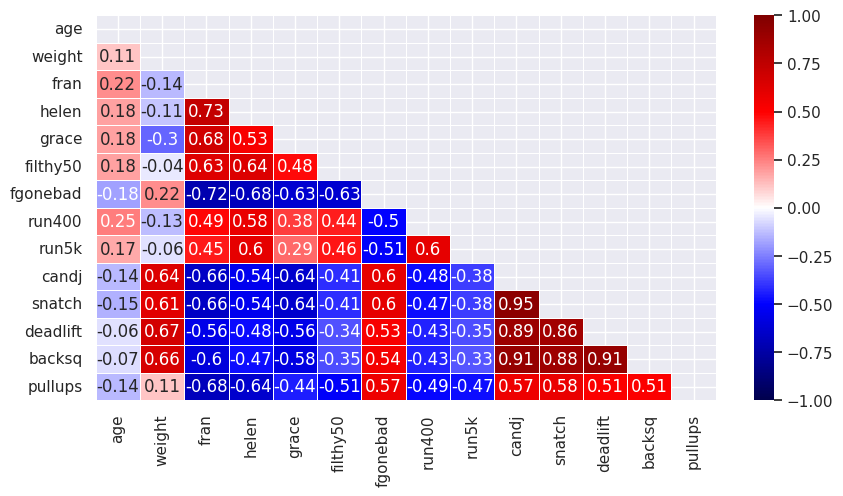

In [58]:
corr = df.iloc[:,2:-5].corr(method='spearman') #dropping athlete_ID col
corr = corr.apply(lambda x: round(x,2)) #rounding corr values to fit into the square in the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle

sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(corr, vmax=1, vmin=-1, center=0, cmap="seismic", annot=True, mask=mask, linewidths=.5)

Considering that:
* higher results for load and rep counting exercises (weightlifting, pullups and fgonebad) are the better;
* and lower results for time exercises (other WODs and cardio) are the better:

### - the negative correlation between load/rep and time results was expected.
### - High correlation
* all weighlifting exercises
* Fran vs Helen, Fran vs FGoneBad


### - Mid correlation
* weight vs all weighlifting exercises
* 400m vs 5k
* pull ups vs weightlifting
* pull ups vs WODs


### - Mid-Low correlation
* WODs vs cardio
* weightlifting vs WODs


### - Low correlation
* pull ups vs cardio
* weighlifting vs cardio

In [34]:
#function to pair results using their correlation as criteria

def correlation_exercises(df_corr,correlation_type):
    if correlation_type == 'high':
        correlation_threshold = abs(corr) >=0.7
    elif correlation_type == 'medium':
        correlation_threshold = (abs(corr) >= 0.5)&(abs(corr) < 0.7)
    elif correlation_type == 'low':
        correlation_threshold = (abs(corr) >= 0.3)&(abs(corr) < 0.5)

    # Encontre onde a condição é verdadeira
    df_corr_thresh = df_corr[correlation_threshold]
    list_corr =[]
    for col in df_corr_thresh.columns:
        for row in df_corr_thresh.index:
            if pd.notna(df_corr_thresh.loc[col,row]):
                pair=[col,row]
                if ([row,col] not in list_corr) & (col!=row): # to avoid duplicates and correlation to self
                    list_corr.append(pair)
    return list_corr

#getting the groups of high/mid/low correlated results
corr_class = ['high','medium','low']
for x in corr_class:
    print(x,'\n',correlation_exercises(corr,x),'\n')

high 
 [['height', 'weight'], ['fran', 'helen'], ['fran', 'fgonebad'], ['candj', 'snatch'], ['candj', 'deadlift'], ['candj', 'backsq'], ['snatch', 'deadlift'], ['snatch', 'backsq'], ['deadlift', 'backsq']] 

medium 
 [['height', 'candj'], ['height', 'snatch'], ['height', 'deadlift'], ['weight', 'candj'], ['weight', 'snatch'], ['weight', 'deadlift'], ['weight', 'backsq'], ['fran', 'grace'], ['fran', 'filthy50'], ['fran', 'candj'], ['fran', 'snatch'], ['fran', 'deadlift'], ['fran', 'backsq'], ['fran', 'pullups'], ['helen', 'grace'], ['helen', 'filthy50'], ['helen', 'fgonebad'], ['helen', 'run400'], ['helen', 'run5k'], ['helen', 'candj'], ['helen', 'snatch'], ['helen', 'pullups'], ['grace', 'fgonebad'], ['grace', 'candj'], ['grace', 'snatch'], ['grace', 'deadlift'], ['grace', 'backsq'], ['filthy50', 'fgonebad'], ['filthy50', 'pullups'], ['fgonebad', 'run400'], ['fgonebad', 'run5k'], ['fgonebad', 'candj'], ['fgonebad', 'snatch'], ['fgonebad', 'deadlift'], ['fgonebad', 'backsq'], ['fgonebad

## Checking if gender impacts on results

In [35]:
# Checking for normality


from scipy import stats
from scipy.stats import kstest

results_list = ['fran', 'helen','grace', 'filthy50', 'fgonebad',
                'run400', 'run5k',
                'candj', 'snatch','deadlift', 'backsq',
                'pullups']

#null hypothesis: the distributions are normal
normal_dist=[]
not_normal_dist=[]
for gender in ['Female','Male']:
    for col in results_list:
        results = df[(df.gender == gender)&(df[col].notna())][col]
        stat, p_value = kstest(results,stats.norm.cdf) # Perform the Shapiro-Wilk test
        #print(f'{col}, Coef: {stat:.2f}, P-value: {p_value:.2f}') # Check the p-value

        # Interpret the p-value
        if p_value > 0.05:
            normal_dist.append([gender,col])
        else:
            not_normal_dist.append([gender,col])
print('\n')
print(f'{normal_dist} appear(s) to follow a normal distribution.')
print(f'{not_normal_dist} do(es) not appear to follow a normal distribution.')



[] appear(s) to follow a normal distribution.
[['Female', 'fran'], ['Female', 'helen'], ['Female', 'grace'], ['Female', 'filthy50'], ['Female', 'fgonebad'], ['Female', 'run400'], ['Female', 'run5k'], ['Female', 'candj'], ['Female', 'snatch'], ['Female', 'deadlift'], ['Female', 'backsq'], ['Female', 'pullups'], ['Male', 'fran'], ['Male', 'helen'], ['Male', 'grace'], ['Male', 'filthy50'], ['Male', 'fgonebad'], ['Male', 'run400'], ['Male', 'run5k'], ['Male', 'candj'], ['Male', 'snatch'], ['Male', 'deadlift'], ['Male', 'backsq'], ['Male', 'pullups']] do(es) not appear to follow a normal distribution.


In [36]:
# Checking for statistic significant difference between genders performing the same exercise

from scipy.stats import mannwhitneyu
stat_diff=[]
not_stat_diff=[]
for col in results_list:
    results_men = df[(df.gender == 'Male')&(df[col].notna())][col]
    results_women = df[(df.gender == 'Female')&(df[col].notna())][col]
    # Mann-Whitney U test
    stat, p_value = mannwhitneyu(results_men, results_women)
    # Checking p-value
    #print(f'{col}: coef: {stat:.2f}, p-value: {p_value}')

        # Interpret the p-value
    if p_value > 0.05:
        not_stat_diff.append([col])
    else:
        stat_diff.append([col])
print('\n')
print(f'{not_stat_diff}: the means of the data sets for women and men are not statistically different.')
print(f'{stat_diff}: the means of the two data sets are statistically different.')



[]: the means of the data sets for women and men are not statistically different.
[['fran'], ['helen'], ['grace'], ['filthy50'], ['fgonebad'], ['run400'], ['run5k'], ['candj'], ['snatch'], ['deadlift'], ['backsq'], ['pullups']]: the means of the two data sets are statistically different.


### For all exercises, men's mean results are better than women's.

#### Example:

<Axes: xlabel='gender', ylabel='snatch'>

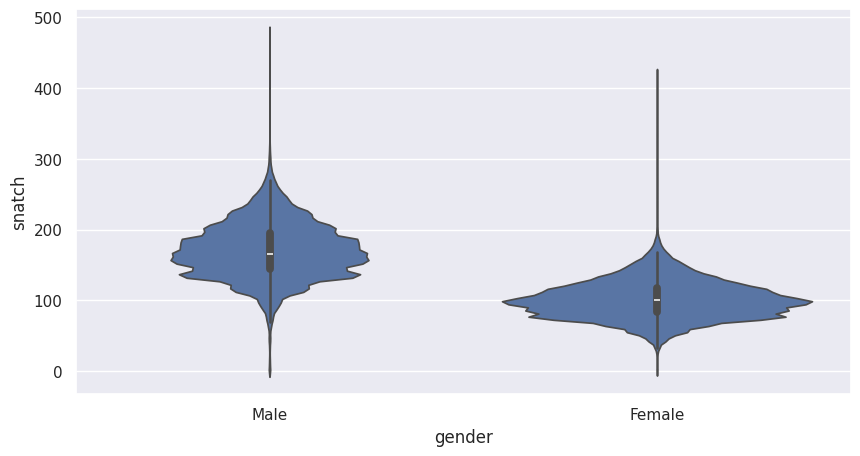

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot(data=df, x="gender", y="snatch")

### And... does time of Crossfit practice affect this gender pattern?

In [38]:
#slicing the original dataframe based on time of CF practice and gender
from statistics import mean

array_of_dfs_women_HL=[]
array_of_dfs_men_HL=[]

for gender in {'Female','Male'}:
    for HL in {'1. Less than 6 months','2. 6-12 months','3. 1-2 years', '4. 2-4 years', '5. 4+ year'}:
        if gender == 'Female':
            array_of_dfs_women_HL.append(df[(df.howlong == HL)&(df.gender == gender)])
        else:
            array_of_dfs_men_HL.append(df[(df.howlong == HL)&(df.gender == gender)])

time_exercise = ['fran', 'helen','grace', 'filthy50',  'run400', 'run5k']
loadrep_exercise = ['fgonebad', 'candj', 'snatch','deadlift', 'backsq', 'pullups']

In [39]:
not_sig=[]
sig=[]
for df_women in array_of_dfs_women_HL:
    for df_men in array_of_dfs_men_HL:
        for exercise in results_list:
            results_men = df_men[exercise][df_men[exercise].notna()]
            results_women = df_women[exercise][df_women[exercise].notna()]
            # Mann-Whitney U test
            stat, p_value = mannwhitneyu(results_men, results_women)
            # Checking p-value
            #print(f'{exercise}: coef: {stat:.2f}, p-value: {p_value}')

            wm_HL=df_women.iloc[0,-1]
            m_HL=df_men.iloc[0,-1]

            #Interpreting the p-value

            mean_women = mean(results_women)
            mean_men = mean(results_men)
            if p_value > 0.05:
                not_sig.append([wm_HL,m_HL,exercise,'same','same',mean_women,mean_men])
            else:
                if exercise in time_exercise:
                    if mean_women > mean_men: #the faster, the better
                        sig.append([wm_HL,m_HL,exercise, 'different','Men',mean_women,mean_men])
                    else:
                        sig.append([wm_HL,m_HL,exercise, 'different','Women',mean_women,mean_men])
                if exercise in loadrep_exercise: #the heavier/more reps, the better
                    if mean_women > mean_men:
                        sig.append([wm_HL,m_HL,exercise, 'different','Women',mean_women,mean_men])
                    else:
                        sig.append([wm_HL,m_HL,exercise, 'different','Men',mean_women,mean_men])
#Joining both lists
gender_results_list = sig+not_sig

#Creating a dataframe to identify the better performers considering gender and the period of CF training
df_gender_results = pd.DataFrame(gender_results_list, columns=['howlong_women', 'howlong_men', 'exercise','mean_comparation','better_performer','mean_women','mean_men'])

#Printing rows in which men are not the better performers
for exercise in results_list:
    print(exercise)
    better_performers=df_gender_results[(df_gender_results.exercise == exercise)]
    print(better_performers[better_performers.better_performer != 'Men'].iloc[:,[0,1,4]])
    print('\n')

fran
    howlong_women            howlong_men better_performer
59     5. 4+ year  1. Less than 6 months            Women
104    5. 4+ year         2. 6-12 months            Women
296  4. 2-4 years  1. Less than 6 months             same


helen
    howlong_women            howlong_men better_performer
288    5. 4+ year  1. Less than 6 months             same
291    5. 4+ year         2. 6-12 months             same


grace
    howlong_women            howlong_men better_performer
60     5. 4+ year  1. Less than 6 months            Women
292    5. 4+ year         2. 6-12 months             same
297  4. 2-4 years  1. Less than 6 months             same


filthy50
             howlong_women            howlong_men better_performer
61              5. 4+ year  1. Less than 6 months            Women
287  1. Less than 6 months  1. Less than 6 months             same
290             5. 4+ year           3. 1-2 years             same
293             5. 4+ year         2. 6-12 months             

# **Conclusions**

* ### cardio and weightlifting
#### - men's means are better in all scenarios
    
* ### pull ups
#### - means are equivalent only when considering women training for 4y+ and men less than 6mo

* ### WODs
#### - women's means are better only when considering women training for 4y+ and men less than 6mo (except for Helen)
#### - fran, grace and filthy50: means are equivalent for women training for 2-4y and men less than 6mo.
#### - fgonebad is the only WOD that women (independently of time of training) and men less than 6mo have equivalent means. Also, woman training for 4y+ and men up to 2y have equivalent means.

# Exploring Ordinal Variables

In [40]:
ord_var = df.iloc[:,-5:] #ordinal variables

In [41]:
for col in ord_var.columns:
    print(col,ord_var.groupby(col).size().idxmax())

eat 3. healthy
train 2. oriented
background 2. high_school
schedule 1. single
howlong 3. 1-2 years


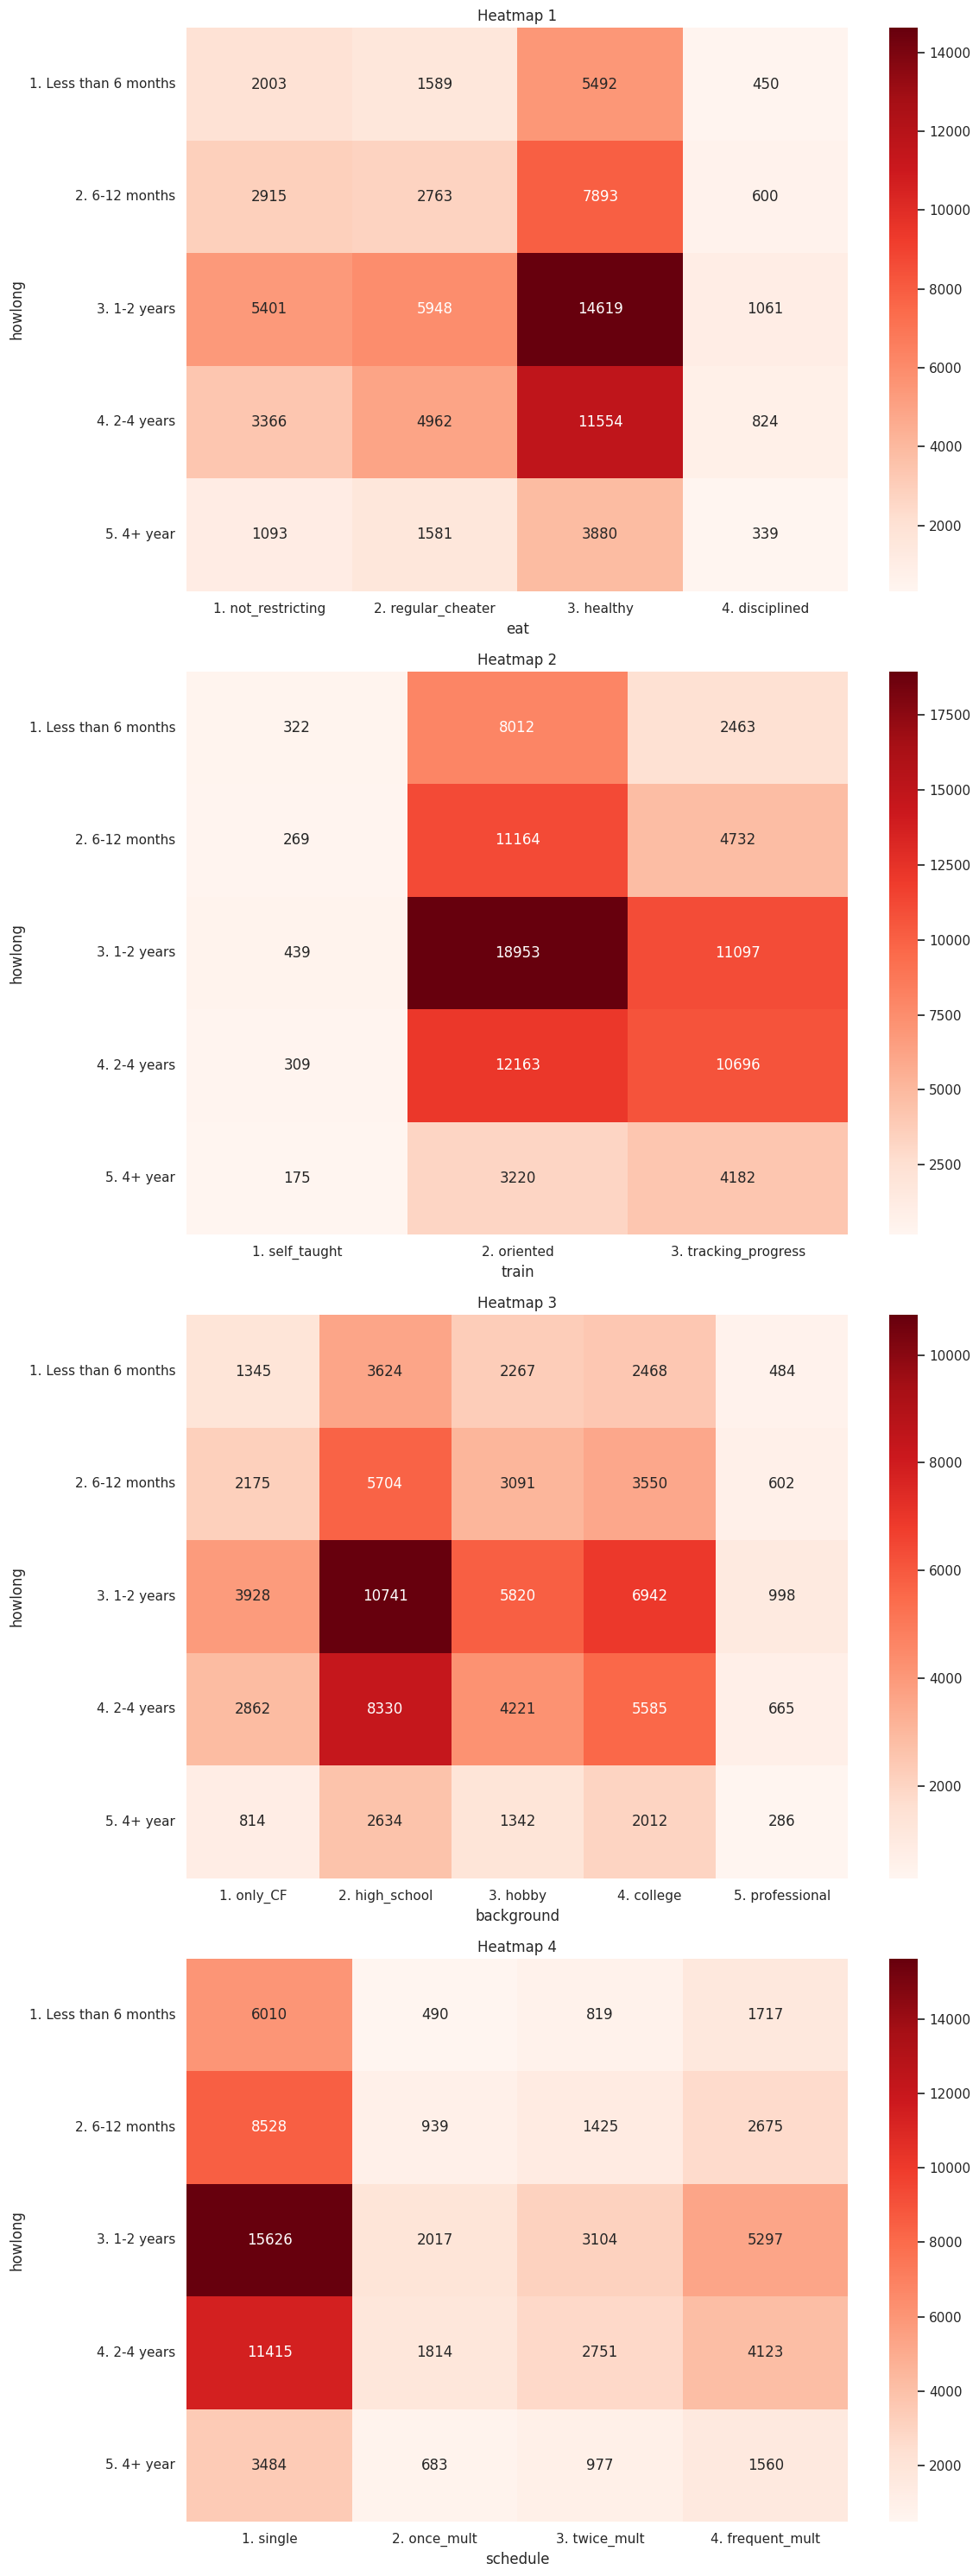

In [42]:
# dataviz of ordinal variables


fig, axs = plt.subplots(4, 1, figsize=(12,30))

for i, col in enumerate(ord_var.iloc[:,:-1]):
    data = ord_var.groupby(['howlong',col]).size().reset_index(name='frequency')
    indexes = data['howlong'].unique()
    columns = data[col].unique()
    data = data['frequency'].values.reshape((len(indexes), len(columns)))
    data = pd.DataFrame(data, index = indexes, columns = columns)

    plt.subplot(4, 1, i + 1)
    sns.heatmap(data, annot=True, fmt='d', cmap='Reds')
    plt.xlabel(col)
    plt.ylabel('howlong')
    plt.title(f"Heatmap {i + 1}")
plt.tight_layout()
plt.show()

# Conclusions
## The most popular group for each variable is people who:
* #### eat: 'eat quality foods but don't measure the amount' or 'eat strict Paleo'. They do not 'eat 1-3 full cheat meals per week', 'weigh and measure my food' or 'eat whatever is convenient'.
* #### train: have a program designed by their coach (gym, personal trainer or CrossFit coach). They do not track their progress or design their own program.
* #### background: have played youth or high school-level sports. They have not played recreational (hobby), college or professional-level sports.
* #### schedule: usually only do one workout a day, instead of multiple workouts.
* #### 1-2 years: have been training CrossFit for 1-2 years.

## The 'howlong' heatmaps indicate:
* ### eat
 * #### For all timeframes, the smallest group is who weigh their meals and the biggest is always who eat healthy.
 * #### The largest group was more than twice the size of the second group (regular cheaters/not restricting).
* ### train
 * #### For all timeframes, the smallest group is who designs their own program and the biggest is who has a program designed by their coach.
 * #### 1-4 years of CrossFit is whenever people most track their progress.
* ### background
 * #### For all timeframes, the crescent order of group size is who played professional-level sports, then only CrossFit, recreational, college, and high school-level sports.
 * #### For most of the timeframes, groups of people who played recreational (hobby) and college-level sports are barely of equal size.
* ### schedule
 * #### For all timeframes, the crescent order of group size is who practice multiple workouts in a day once a week, then twice a week, multiple times a week and the biggest is who workouts once a day.
